# Chapter 1: Packages using

In [2]:
!pip install pathlib
!pip install xgboost

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [26]:
from pathlib import Path
from dataclasses import dataclass
import glob
import yaml

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read all files into pd.DataFrames

In [11]:
test_dir = "../input/predict-volcanic-eruptions-ingv-oe/test"
train_dir = "../input/predict-volcanic-eruptions-ingv-oe/train"
meta_dir = "../input/predict-volcanic-eruptions-ingv-oe/train.csv"

In [12]:
test_files, train_files = glob.glob(f"{test_dir}/*.csv"), glob.glob(f"{train_dir}/*.csv")
meta_data = pd.read_csv(meta_dir)
meta_data

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


# Chapter 2: General exploration through files

In [16]:
@dataclass
class CsvUtil:
    '''
    Get csv data and methods
    '''
    file_: str #".csv file path"
    
    @staticmethod
    def get_data(file_):
        data = pd.read_csv(file_, index_col = False)
        return data
    
    @property
    def data(self):
        return self.get_data(self.file_)
    
    @property
    def shape(self):
        return self.data.shape
    
    @property
    def name(self):
        filename = Path(self.file_).stem
        return filename
        
    def visualize(self, col_name: str) -> "Line graph presenting every column's change over time":
        x_axis = self.data.index
        y_axis = self.data[col_name]
        plt.plot(x_axis, y_axis)
        
    def concat(self, *others: "CsvUtil" or list, axis: int) -> "Concatenante dataframe on y axis":
        dataframes = [self.data]
        # Allow passing a list of dataframes
#         if isinstance(others, list):
#             pass

        for another in others:
            dataframes.append(another.data)
        return pd.concat(dataframes, axis = axis)
            

In [17]:
# Sampling on the first file
util0 = CsvUtil(train_files[0])
print(util0.shape)
util0_cols = util0.data.columns
print(util0_cols)

(60001, 10)
Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10'],
      dtype='object')


In [18]:
print(type(util0.data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
util0.visualize("sensor_1")
util0.visualize("sensor_2")
# util0.visualize("sensor_3")

This is obviously a wave form data - search gg for "how to process wave-form data"

In [ ]:
# Fill na with:
## If 1 single cell between 2 non-na values -> mean of the 2
## If more than 1 cells -< mean of the whole column

In [27]:
# Similarly, join all csv files into 1 pd.DataFrame


In [ ]:
# Get number of null values in columns of each files => visualize

In [ ]:
# Get only the amplitude 

# Chapter 3: EDA & FE

In [ ]:
# Add filename to 11th column "name"

In [ ]:
# Join data between train.csv (output) and filename.csv (input)

In [ ]:
# Feature visualizing in time series

In [21]:
# Fill Null calls with mean values

In [ ]:
# Feature-outcome relationship

# Chapter 4: Baseline Model

### Customize model params & dataloader

In [ ]:
# Convert pd.DataFrame into xgb.DMatrix

In [30]:
configs = {"tree": "../input/config/config_gbtree.yml",
           "forest": "../input/config/config_gbforest.yml",
           "linear": "../input/config/config_gblin.yml"}

In [28]:
method = "tree" # Model type, options ["tree", "forest", linear"]

In [31]:
# Parse config
def parse_config(method, configs):
    with open(configs[method], 'r') as yfi:
        config = yaml.load(yfi)
    return config

Evaluation metric is Mean Absolute Error

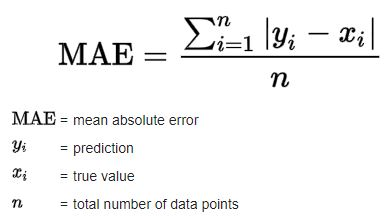

Loss function for Regression task is Squared Error
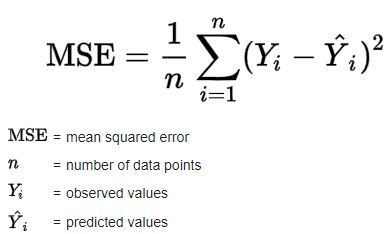

### Initialize model

*Refer to this source to know more about training params*

[XGB Training source code](https://github.com/dmlc/xgboost/blob/master/python-package/xgboost/training.py)

In [ ]:
@dataclass
class ModelClass:
    method: str # option in ["tree", "forest", "linear"]
    config: dict
    
    @property
    def config(self):
        return parse_config(self.method, self.config)
    
    def train(self):
        self.model = xgb.train(self.config, )
    
    def evaluate(self, source):
        pass

In [ ]:
# Fit data to model

In [ ]:
# Dump model to file

### Export result (.csv) and evaluate

In [19]:
@dataclass
class Evaluator:
    source: "file_path"
    dataframe: pd.core.frame.DataFrame
        
    def export_csv(dataframe, output):
        col_names = ['segment_id', 'time_to_eruption']
        result = self.dataframe.to_csv(output, header=col_names, index=False)
    
    @staticmethod
    def get_source(source):
        data = pd.read_csv(source, index_col=False)
        
    def accuracy(self, source):
        '''
        Add prediction column to train.csv
        '''
        # y = train.csv["time_to_eruption"]
        pass
        
    